<a href="https://colab.research.google.com/github/YAbhinandana/House-price-prediction/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Developing a house price prediction model using Python, scikit-learn, and TensorFlow involves several steps, including data preprocessing, feature engineering, model development, and evaluation.

In [34]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
#LOADING DATASET
data = pd.read_csv('/content/Housing.csv')

In [36]:
# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [38]:
#PREPROCESSING OF DATA
# Separate features and target variable
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

In [40]:
X


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [41]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
5,10850000
6,10150000
7,10150000
8,9870000
9,9800000


In [43]:
# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


In [44]:
# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [47]:
#BUILD NEURAL NETWORK MODEL USING TEENSORFLOW
# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [49]:
# Train the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
11/11 [==============================] - 2s 24ms/step - loss: 25349383520256.0000 - val_loss: 24781583810560.0000
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 25349362548736.0000 - val_loss: 24781556547584.0000
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 25349318508544.0000 - val_loss: 24781485244416.0000
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 25349207359488.0000 - val_loss: 24781325860864.0000
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 25348974575616.0000 - val_loss: 24780988219392.0000
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 25348490133504.0000 - val_loss: 24780331810816.0000
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 25347588358144.0000 - val_loss: 24779130142720.0000
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 25345965162496.0000 - val_loss: 24777098002432.0000

In [50]:
#EVALUATING MODEL
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

4/4 [==============================] - 0s 3ms/step
Root Mean Squared Error: 1491027.5259195021


In [54]:
model.save('house_price_model.h5')


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

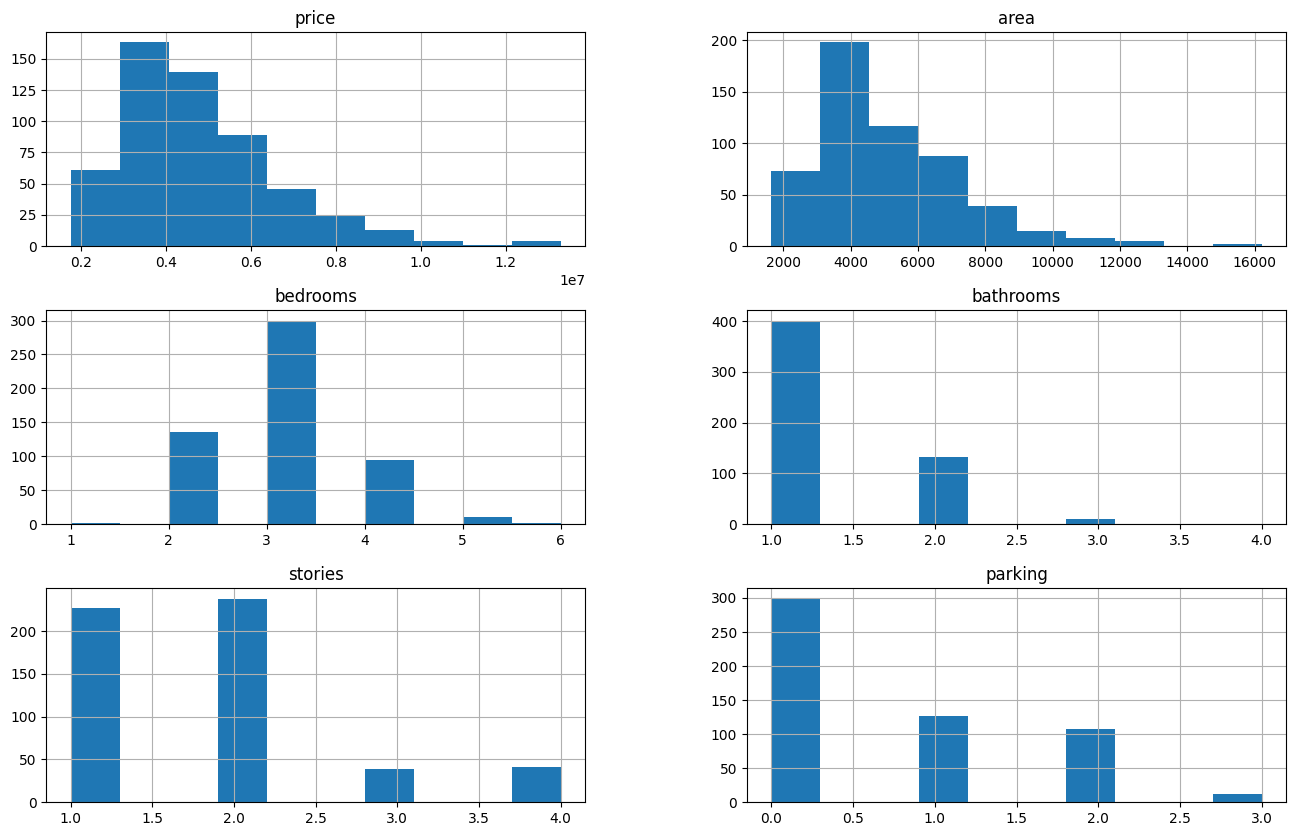

In [55]:
 data.hist(figsize = (16,10))

In [64]:
#LINEAR REGRESSION MODEL TRAINING

In [58]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [59]:
reg.score(X_test, y_test) ##accuracy check

0.6529242642153175

In [65]:
#RANDOM FOREST REGRESSION MODEL TRAINING

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
forest.score(X_test,y_test)

0.6189380209776127

In [66]:
#DECISION TREE CLASSIFIER MODEL TRAINING

In [62]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
model.score(X_train, y_train)

0.9862385321100917

#Developed a machine learning model for house price prediction using Python,scikit-learn, and TensorFlow.
